<a href="https://colab.research.google.com/github/arnaldourbina/HACKATON_Equipo_H12-25-L-Equipo74/blob/main/An%C3%A1lisis_flights2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Estudiando los datos

In [ ]:
import pandas as pd
import polars as pl


In [ ]:
# datos = pd.read_parquet("/content/flights2015.parquet")#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_parquet("/content/drive/MyDrive/HACKATHON/ARCHIVOS 2015/flights2015.parquet")

In [ ]:
datos["ORIGIN_AIRPORT"] = datos["ORIGIN_AIRPORT"].astype(str) # Forzar columna a string

cols_airports = ["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"] # Forzar columnas de aeropuertos a texto

for col in cols_airports:
    datos[col] = datos[col].astype(str)




In [ ]:
datos.to_parquet("/content/drive/MyDrive/HACKATHON/ARCHIVOS 2015/flights2015.parquet", engine="pyarrow", index=False)
# Guardar como Parquet


In [ ]:
# Diccionario de traducción de columnas
columnas_es = {
    "YEAR": "AÑO",
    "MONTH": "MES",
    "DAY": "DÍA",
    "DAY_OF_WEEK": "DÍA_SEMANA",
    "AIRLINE":"AEROLÍNEA",
    "FLIGHT_NUMBER": "NÚMERO_VUELO",
    "TAIL_NUMBER":"NÚMERO_DEL_AVIÓN",
    "ORIGIN_AIRPORT":"AEROPUERTO_ORIGEN",
    "DESTINATION_AIRPORT":"AEROPUERTO_DESTINO",
    "SCHEDULED_DEPARTURE": "SALIDA_PROGRAMADA",
    "DEPARTURE_TIME": "HORA_SALIDA",
    "DEPARTURE_DELAY": "RETRASO_SALIDA",
    "TAXI_OUT": "RODAJE_SALIDA",
    "WHEELS_ON":"ATERRIZAJE",
    "TAXI_IN":"RODAJE_LLEGADA",
    "WHEELS_OFF": "DESPEGUE",
    "SCHEDULED_ARRIVAL": "LLEGADA_PROGRAMADA",
    "ARRIVAL_TIME": "HORA_LLEGADA",
    "ARRIVAL_DELAY": "RETRASO_LLEGADA",
    "DIVERTED": "DESVIADO",
    "CANCELLED": "CANCELADO",
    "AIR_SYSTEM_DELAY": "RETRASO_SISTEMA_AÉREO",
    "SECURITY_DELAY": "RETRASO_SEGURIDAD",
    "AIRLINE_DELAY": "RETRASO_AEROLÍNEA",
    "LATE_AIRCRAFT_DELAY": "RETRASO_AVIÓN_TARDÍO",
    "WEATHER_DELAY": "RETRASO_CLIMA",
    "SCHEDULED_TIME":"TIEMPO_PROGRAMADO",
    "ELAPSED_TIME":"TIEMPO_TOTAL_REAL",
    "AIR_TIME":"TIEMPO_EN_AIRE",
    "DISTANCE":"DISTANCIA",
    "CANCELLATION_REASON":"RAZÓN_CANCELACIÓN"

}

# Aplicar la traducción
datos = datos.rename(columns=columnas_es)

# Verificar
print(datos.columns)

Index(['AÑO', 'MES', 'DÍA', 'DÍA_SEMANA', 'AEROLÍNEA', 'NÚMERO_VUELO',
       'NÚMERO_DEL_AVIÓN', 'AEROPUERTO_ORIGEN', 'AEROPUERTO_DESTINO',
       'SALIDA_PROGRAMADA', 'HORA_SALIDA', 'RETRASO_SALIDA', 'RODAJE_SALIDA',
       'DESPEGUE', 'TIEMPO_PROGRAMADO', 'TIEMPO_TOTAL_REAL', 'TIEMPO_EN_AIRE',
       'DISTANCIA', 'ATERRIZAJE', 'RODAJE_LLEGADA', 'LLEGADA_PROGRAMADA',
       'HORA_LLEGADA', 'RETRASO_LLEGADA', 'DESVIADO', 'CANCELADO',
       'RAZÓN_CANCELACIÓN', 'RETRASO_SISTEMA_AÉREO', 'RETRASO_SEGURIDAD',
       'RETRASO_AEROLÍNEA', 'RETRASO_AVIÓN_TARDÍO', 'RETRASO_CLIMA'],
      dtype='object')


In [ ]:
# TRANSFORMACIÓN DE UNIDADES MILLAS A KM #
datos['DISTANCIA'] = datos['DISTANCIA'] * 1.60934



In [ ]:
# "No Cancelado" indica que el vuelo no fue cancelado.#
#  0=indica que no hubo retraso por esa causa.#


datos = datos.fillna({
    'RAZÓN_CANCELACIÓN': 'No Cancelado',
    'RETRASO_SISTEMA_AÉREO': 0,
    'RETRASO_SEGURIDAD': 0,
    'RETRASO_AEROLÍNEA': 0,
    'RETRASO_AVIÓN_TARDÍO': 0,
    'RETRASO_CLIMA': 0
})

In [ ]:
import pandas as pd

# Transformar minutos a hora decimal
datos['HORA_SALIDA'] = datos['HORA_SALIDA'] / 60
datos['HORA_LLEGADA'] = datos['HORA_LLEGADA'] / 60
datos['SALIDA_PROGRAMADA'] = datos['SALIDA_PROGRAMADA'] / 60
datos['LLEGADA_PROGRAMA'] = datos['LLEGADA_PROGRAMADA'] / 60

📊 **Estrategia práctica**
- Horas del día → hora decimal (para análisis de patrones diarios).
- Retrasos → minutos (para análisis de magnitud y frecuencia).
- Duraciones largas → horas (ej. vuelos de más de 120 min, puedes convertirlos a horas para comunicar mejor).


In [ ]:
datos.head(5)

,AÑO,MES,DÍA,DÍA_SEMANA,AEROLÍNEA,NÚMERO_VUELO,NÚMERO_DEL_AVIÓN,AEROPUERTO_ORIGEN,AEROPUERTO_DESTINO,SALIDA_PROGRAMADA,...,RETRASO_LLEGADA,DESVIADO,CANCELADO,RAZÓN_CANCELACIÓN,RETRASO_SISTEMA_AÉREO,RETRASO_SEGURIDAD,RETRASO_AEROLÍNEA,RETRASO_AVIÓN_TARDÍO,RETRASO_CLIMA,LLEGADA_PROGRAMA
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0.083333,...,-22.0,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,7.166667
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0.166667,...,-9.0,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,12.500000
2,2015,1,1,4,US,840,N171US,SFO,CLT,0.333333,...,5.0,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,13.433333
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0.333333,...,-9.0,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,13.416667
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0.416667,...,-21.0,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,5.333333


In [ ]:
datos.loc[1]

,1
AÑO,2015
MES,1
DÍA,1
DÍA_SEMANA,4
AEROLÍNEA,AA
NÚMERO_VUELO,2336
NÚMERO_DEL_AVIÓN,N3KUAA
AEROPUERTO_ORIGEN,LAX
AEROPUERTO_DESTINO,PBI
SALIDA_PROGRAMADA,0.166667


📊 **DESCRIPCIÓN DE COLUMNAS**
| NOMBRE |DESCRIPCIÓN                                          |
|--------|-----------------------------------------------------|
| AÑO    |  Año en que se realizó o estaba programado el vuelo.|
|MES  | Mes del vuelo (1 = enero, 12 = diciembre). |
|DÍA  | Día del mes en que ocurrió el vuelo. |
|DÍA_SEMANA  | Día de la semana (1 = lunes, 7 = domingo). |
| AEROLÍNEA |  Código de la aerolínea que opera el vuelo (ej. AA = American Airlines, WN = Southwest).|
|NÚMERO_VUELO  | Número de vuelo asignado por la aerolínea. |
| NÚMERO_DEL_AVIÓN  | Matrícula única del avión, como la “placa” de un automóvil (ej. N485HA). |
| AEROPUERTO_ORIGEN | Código IATA del aeropuerto desde donde despega el vuelo. |
| AEROPUERTO_DESTINO | Código IATA del aeropuerto donde aterriza el vuelo. |
| SALIDA_PROGRAMADA | Hora programada de salida (formato HHMM). |
| HORA_LLEGADA | Hora real en que el avión llegó al aeropuerto destino. |
|HORA_SALIDA | Hora real en que el avión sale del aeropuerto origen. |
| RETRASO_LLEGADA | Diferencia en minutos entre la hora real de llegada y la programada (positivo = retraso, negativo = adelantado). |
|DESVIADO  | Indica si el vuelo fue desviado a otro aeropuerto (1 = sí, 0 = no). |
|CANCELADO  | Indica si el vuelo fue cancelado (1 = sí, 0 = no). |
| RAZÓN_CANCELACIÓN |Motivo de cancelación: A = sistema aéreo, B = seguridad, C = aerolínea, D = clima.  |
| RETRASO_SISTEMA_AÉREO |Minutos de retraso atribuibles al sistema aéreo (congestión, control de tráfico aéreo).
|RETRASO_SEGURIDAD  |Minutos de retraso por controles o incidentes de seguridad.  |
| RETRASO_AEROLÍNEA | Minutos de retraso atribuibles a la aerolínea (tripulación, mantenimiento, logística interna). |
|RETRASO_AVIÓN_TARDÍO  | Minutos de retraso porque el avión llegó tarde de un vuelo anterior (efecto cascada). |
| RETRASO_CLIMA | Minutos de retraso por condiciones meteorológicas adversas (tormentas, nieve, niebla, viento). |
|TIEMPO_PROGRAMADO|Es la duración estimada del vuelo según el plan de la aerolínea (en minutos)|
|TIEMPO_TOTAL_REAL|Es el tiempo que realmente tomó el vuelo desde la salida hasta la llegada, incluyendo rodaje de salida y rodaje de entrada.|
|TIEMPO_EN_AIRE|Es el tiempo que el avión estuvo efectivamente volando, desde el despegue hasta el aterrizaje.|
|DISTANCIA|Registra la distancia de los vuelos en kilómetros|







In [ ]:
datos.shape

(5819079, 32)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 32 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   AÑO                    int64  
 1   MES                    int64  
 2   DÍA                    int64  
 3   DÍA_SEMANA             int64  
 4   AEROLÍNEA              object 
 5   NÚMERO_VUELO           int64  
 6   NÚMERO_DEL_AVIÓN       object 
 7   AEROPUERTO_ORIGEN      object 
 8   AEROPUERTO_DESTINO     object 
 9   SALIDA_PROGRAMADA      float64
 10  HORA_SALIDA            float64
 11  RETRASO_SALIDA         float64
 12  RODAJE_SALIDA          float64
 13  DESPEGUE               float64
 14  TIEMPO_PROGRAMADO      float64
 15  TIEMPO_TOTAL_REAL      float64
 16  TIEMPO_EN_AIRE         float64
 17  DISTANCIA              float64
 18  ATERRIZAJE             float64
 19  RODAJE_LLEGADA         float64
 20  LLEGADA_PROGRAMADA     int64  
 21  HORA_LLEGADA           float64
 22  RETRASO_LLEGADA   

In [ ]:
datos.sort_values(by="AEROLÍNEA").describe(include="O") #Generación de estadísticas de columnas categóricas o de texto##


,AEROLÍNEA,NÚMERO_DEL_AVIÓN,AEROPUERTO_ORIGEN,AEROPUERTO_DESTINO,RAZÓN_CANCELACIÓN
count,5819079,5804358,5819079,5819079,5819079
unique,14,4897,628,629,5
top,WN,N480HA,ATL,ATL,No Cancelado
freq,1261855,3768,346836,346904,5729195


🔎 Lectura de cada columna
- AEROLÍNEA
- Total de registros: 5,819,079.
- Hay 14 aerolíneas distintas.
- La más frecuente es WN (Southwest Airlines) con 1,261,855 vuelos.
👉 Esto muestra que el dataset está dominado por una aerolínea en particular.
- NÚMERO_DEL_AVIÓN
- Registros no nulos: 5,804,358 (hay algunos faltantes).
- Hay 4,897 aviones distintos.
- El avión más frecuente es N480HA, con 3,768 vuelos.
👉 Algunos aviones vuelan muchas veces, lo que puede ser útil para analizar mantenimiento o patrones de retraso.
- AEROPUERTO_ORIGEN
- Total de registros: 5,819,079.
- Hay 628 aeropuertos distintos de origen.
- El más frecuente es ATL (Atlanta) con 346,836 vuelos saliendo de allí.
👉 ATL es un hub clave en tu dataset.
- AEROPUERTO_DESTINO
- Total de registros: 5,819,079.
- Hay 629 aeropuertos distintos de destino.
- El más frecuente también es ATL (Atlanta) con 346,904 vuelos llegando allí.
👉 ATL aparece como origen y destino principal, confirmando su rol de mega-hub.
- RAZÓN_CANCELACIÓN
- Total de registros: 5,819,079.
- Hay 5 categorías distintas (ej. clima, seguridad, aerolínea, avión tardío, y “No Cancelado”).
- El valor más frecuente es “No Cancelado”, con 5,729,195 vuelos.
👉 La gran mayoría de vuelos no fueron cancelados, lo que es esperable.

✨ Interpretación general
- El dataset es muy grande (5.8 millones de vuelos).
- Está dominado por una aerolínea (WN) y por un aeropuerto (ATL).
- La mayoría de vuelos no están cancelados, lo que genera un desbalance de clases si quisieras modelar cancelaciones.
- El campo NÚMERO_DEL_AVIÓN muestra que algunos aviones vuelan miles de veces, lo que puede ser útil para análisis longitudinales.



In [ ]:
datos['RAZÓN_CANCELACIÓN'].value_counts()

,count
RAZÓN_CANCELACIÓN,
No Cancelado,5729195
B,48851
A,25262
C,15749
D,22


In [ ]:
Número_vuelos_cancelados = datos['RAZÓN_CANCELACIÓN'].isin(["A","B","C","D"])
Número_vuelos_cancelados.sum()

np.int64(89884)

📊 **Qué significa unique = 4 en CANCELLATION_REASON**
- Se refiere 4 categorías oficiales de motivo de cancelación que usa el dataset del DOT/FAA en EE.UU.
- Los códigos son:
>- A → RETRASO_SISTEMA_AÉREO (problemas del sistema aéreo: control de tráfico, congestión).
>- B → RETRASO_SEGURIDAD (temas de seguridad).
>- C → RETRASO_AEROLÍNEA (problemas internos de la aerolínea: tripulación, mantenimiento).
>- D → RETRASO_CLIMA (clima).


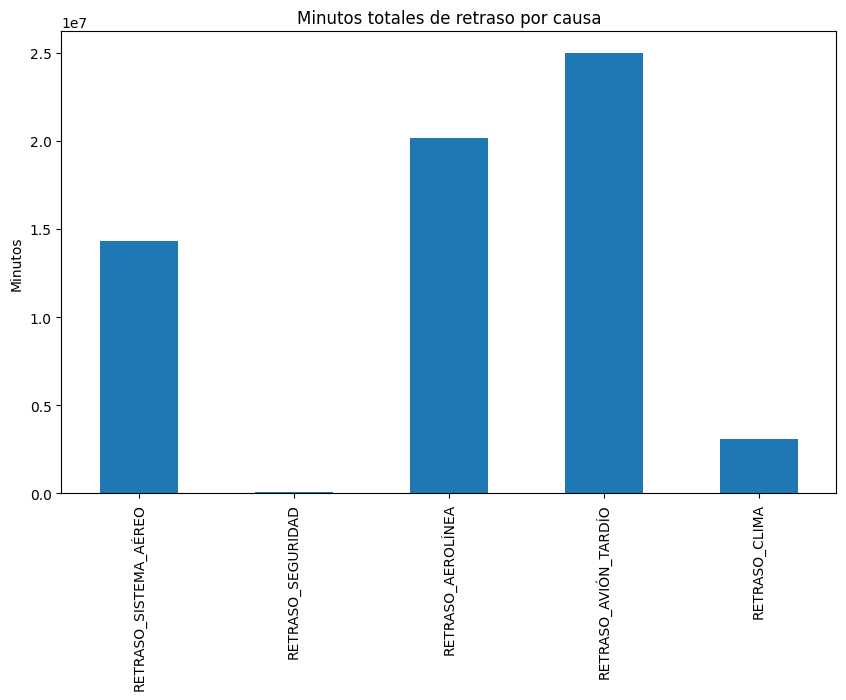

In [ ]:
import matplotlib.pyplot as plt

causas = ['RETRASO_SISTEMA_AÉREO','RETRASO_SEGURIDAD',
          'RETRASO_AEROLÍNEA','RETRASO_AVIÓN_TARDÍO','RETRASO_CLIMA']

datos[causas].sum().plot(kind='bar', figsize=(10,6))
plt.title("Minutos totales de retraso por causa")
plt.ylabel("Minutos")
plt.show()

📊 **Comparación de magnitudes**
| Categoría de retraso | Rango en minutos | Interpretación |
|----------------------|------------------|----------------|
|Puntualidad aceptada  | 0–15 | Normal, sin impacto significativo |
|Retraso leve  |16–30  | Aún tolerable, frecuente en operaciones |
|Retraso moderado  |31–60  | Ya afecta conexiones y logística |
| Retraso grave |  >60| Impacto fuerte en pasajeros y aerolínea |
|Retraso extremo|>180|Casos excepcionales, suelen implicar compensaciones|






🔄 **Relación entre variable que explican el RETRASO_AVIÓN_TARDÍO.**

- Un RETRASO_LLEGADA positivo puede provocar que el avión llegue tarde al aeropuerto de origen.
- Ese mismo avión necesita tiempo para desembarcar pasajeros, cargar combustible, embarcar nuevos pasajeros y realizar rodaje, puede generar un RETRASO_SALIDA positivo en su siguiente vuelo desde el aeropuerto de origen.
- Es el famoso efecto cascada (RETRASO_AVIÓN_TARDÍO): un retraso en llegada se transmite como retraso en salida.


🔎 **Ejemplo práctico**
Imagina un avión que debía salir a las 10:00:
- **Llega a la puerta a las 09:50, pero por problemas de embarque sale a las 10:20 →**
>- RETRASO_SALIDA = 20 min
>- RETRASO_AVIÓN_TARDÍO = 0 min (porque el avión estaba a tiempo, el retraso fue por otra causa).
- **Llega a la puerta a las 10:30 porque venía atrasado de otro vuelo →**
>- RETRASO_SALIDA = 30 min
>- RETRASO_AVIÓN_TARDÍO = 30 min (el retraso de salida se explica totalmente por la llegada tardía).
- **Llega a las 10:20 y además hay problemas de embarque hasta las 10:40 →**
>- RETRASO_SALIDA = 40 min
>- RETRASO_AVIÓN_TARDÍO = 20 min (solo parte del retraso se debe al avión tardío).


**Ahora, conceptualmente:**

- **RETRASO_AVIÓN_TARDÍO** no es una causa primaria, sino más bien un efecto acumulado.
- Se refiere a los minutos de retraso que un vuelo hereda porque el avión llegó tarde de un vuelo anterior.
- Ese retraso puede estar explicado por cualquiera de las otras causas:
- **RETRASO_CLIMA** → si el vuelo anterior se demoró por tormenta.
- **RETRASO_AEROLÍNEA** → si hubo problemas operativos o logísticos.
- **RETRASO_SISTEMA_AÉREO** → congestión en el tráfico aéreo.
- **RETRASO_SEGURIDAD** → inspecciones adicionales.

👉 En otras palabras: todos esos retrasos pueden alimentar el retraso del avión tardío, porque si un vuelo se demora por cualquiera de esas razones, el avión llega tarde y arrastra el retraso al siguiente vuelo.


/tmp/ipython-input-2148583540.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


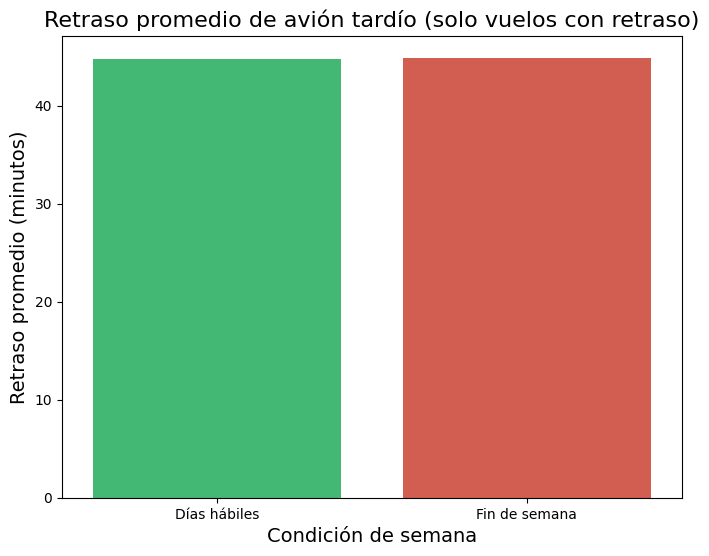

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear columna booleana para fin de semana
datos['es_fin_de_semana'] = datos['DÍA_SEMANA'].isin([6, 7])

# Filtrar solo vuelos con retraso positivo
datos_filtrados = datos[datos['RETRASO_AVIÓN_TARDÍO'] > 0]

# Calcular promedio de retraso por condición (hábil vs fin de semana)
promedios = datos_filtrados.groupby('es_fin_de_semana')['RETRASO_AVIÓN_TARDÍO'].mean().reset_index()

# Mapear valores a etiquetas en español
promedios['es_fin_de_semana'] = promedios['es_fin_de_semana'].map({True: 'Fin de semana', False: 'Días hábiles'})

# Crear gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(
    x='es_fin_de_semana',
    y='RETRASO_AVIÓN_TARDÍO',
    data=promedios,
    palette={'Días hábiles': '#2ECC71', 'Fin de semana': '#E74C3C'}
)

# Personalización
plt.title("Retraso promedio de avión tardío (solo vuelos con retraso)", fontsize=16)
plt.xlabel("Condición de semana", fontsize=14)
plt.ylabel("Retraso promedio (minutos)", fontsize=14)
plt.show()

/tmp/ipython-input-2821473560.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


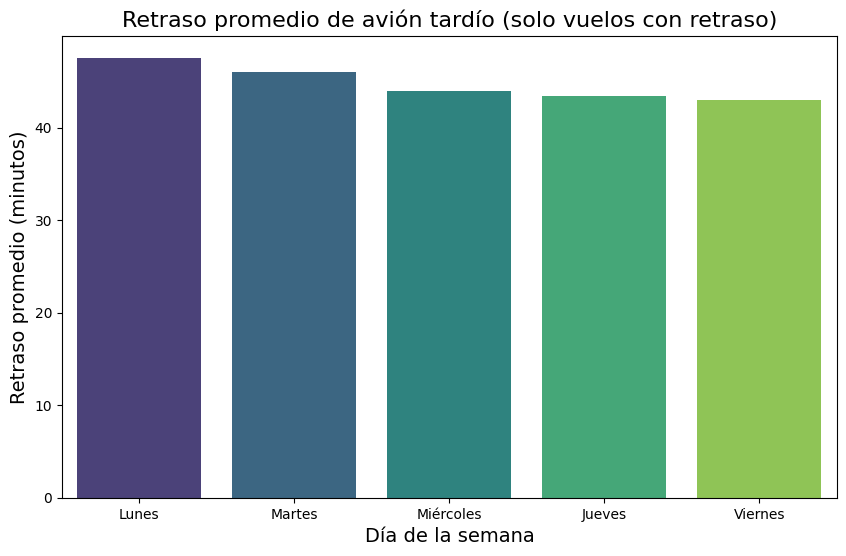

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo días de semana (lunes a viernes) y vuelos con retraso > 0
dias_semana = datos[(datos['DÍA_SEMANA'].isin([1,2,3,4,5])) & (datos['RETRASO_AVIÓN_TARDÍO'] > 0)]

# Calcular promedio de retraso por día
promedios = dias_semana.groupby('DÍA_SEMANA')['RETRASO_AVIÓN_TARDÍO'].mean().reset_index()

# Mapear números a nombres de días
map_dias = {1:'Lunes', 2:'Martes', 3:'Miércoles', 4:'Jueves', 5:'Viernes'}
promedios['DÍA_SEMANA'] = promedios['DÍA_SEMANA'].map(map_dias)

# Crear gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(
    x='DÍA_SEMANA',
    y='RETRASO_AVIÓN_TARDÍO',
    data=promedios,
    palette='viridis'
)

# Personalización
plt.title("Retraso promedio de avión tardío (solo vuelos con retraso)", fontsize=16)
plt.xlabel("Día de la semana", fontsize=14)
plt.ylabel("Retraso promedio (minutos)", fontsize=14)
plt.show()

/tmp/ipython-input-1641426789.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


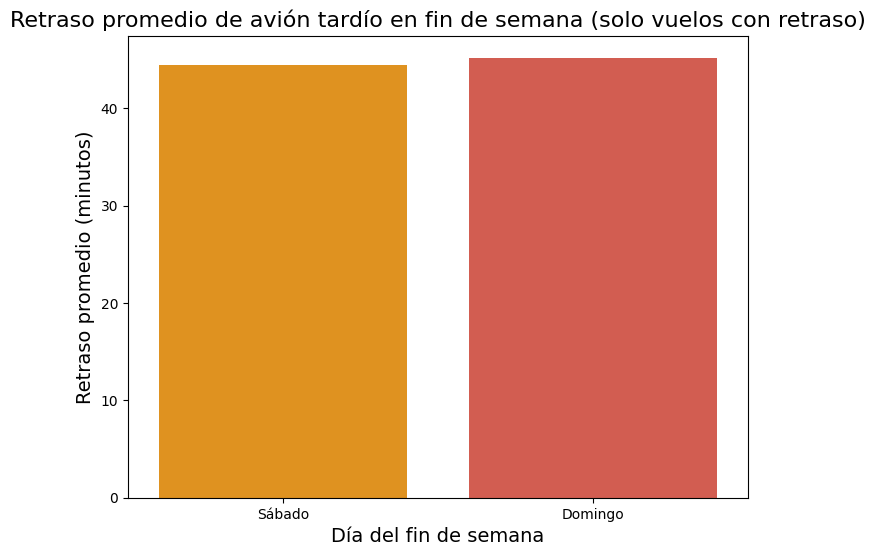

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo vuelos de fin de semana (sábado=6, domingo=7) y con retraso > 0
fin_semana = datos[(datos['DÍA_SEMANA'].isin([6,7])) & (datos['RETRASO_AVIÓN_TARDÍO'] > 0)]

# Calcular promedio de retraso por día del fin de semana
promedios = fin_semana.groupby('DÍA_SEMANA')['RETRASO_AVIÓN_TARDÍO'].mean().reset_index()

# Mapear números a nombres de días
map_dias = {6:'Sábado', 7:'Domingo'}
promedios['DÍA_SEMANA'] = promedios['DÍA_SEMANA'].map(map_dias)

# Crear gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(
    x='DÍA_SEMANA',
    y='RETRASO_AVIÓN_TARDÍO',
    data=promedios,
    palette={'Sábado':'#FF9800','Domingo':'#E74C3C'}  # naranja y rojo
)

# Personalización
plt.title("Retraso promedio de avión tardío en fin de semana (solo vuelos con retraso)", fontsize=16)
plt.xlabel("Día del fin de semana", fontsize=14)
plt.ylabel("Retraso promedio (minutos)", fontsize=14)
plt.show()

#**REGRESIÓN LINEAL SIMPLE**

📊 **Pasos para graficar**

1.-  Definir variables
- X: por ejemplo, departure_time.
- Y: delay.

2.- Calcular la recta de regresión
- Usar mínimos cuadrados para obtener $$\beta _0$$ y  $$\beta _1$$.
- Fórmulas:

$$\beta _1=\frac{\sum (X_i-\bar {X})(Y_i-\bar {Y})}{\sum (X_i-\bar {X})^2}$$

$$\beta _0=\bar {Y}-\beta _1\bar {X}$$

3.- Graficar
- Dibujar los puntos $$(X_i,Y_i)$$.
- Dibujar la recta de regresión:
$$\hat {Y}=\beta _0+\beta _1X$$

4.- Identificar puntos alejados
- Calcular residuos:

$$e_i=Y_i-\hat {Y}_i$$

- Los puntos con residuos grandes (positivos o negativos) son los que se demoran más o menos de lo esperado.


                             OLS Regression Results                             
Dep. Variable:     RETRASO_AVIÓN_TARDÍO   R-squared:                       0.637
Model:                              OLS   Adj. R-squared:                  0.637
Method:                   Least Squares   F-statistic:                 9.786e+05
Date:                  Thu, 01 Jan 2026   Prob (F-statistic):               0.00
Time:                          18:40:01   Log-Likelihood:            -2.6983e+06
No. Observations:                556953   AIC:                         5.397e+06
Df Residuals:                    556951   BIC:                         5.397e+06
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.

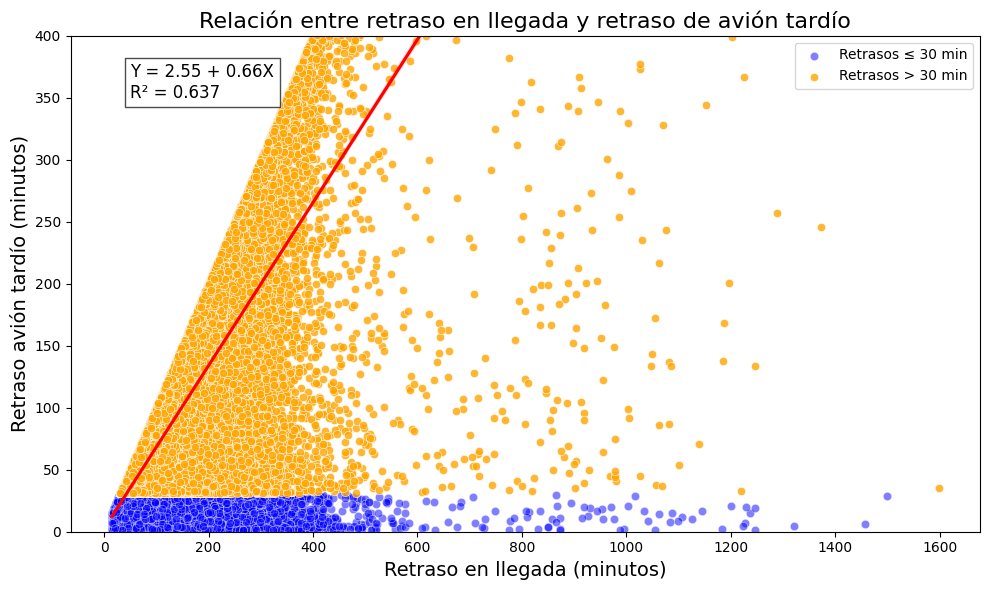

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Filtrar solo vuelos con retraso positivo
datos_filtrados = datos[datos['RETRASO_AVIÓN_TARDÍO'] > 0]

# Definir umbral para outliers (ejemplo: retrasos mayores a 30 minutos ya son relevantes)
umbral_outlier = 30
outliers = datos_filtrados[datos_filtrados['RETRASO_AVIÓN_TARDÍO'] > umbral_outlier]
no_outliers = datos_filtrados[datos_filtrados['RETRASO_AVIÓN_TARDÍO'] <= umbral_outlier]

# --- MODELO DE REGRESIÓN LINEAL SIMPLE ---
X = datos_filtrados['RETRASO_LLEGADA']
y = datos_filtrados['RETRASO_AVIÓN_TARDÍO']

X_const = sm.add_constant(X)  # agrega intercepto
modelo = sm.OLS(y, X_const).fit()

# Extraer coeficientes para la ecuación y R^2
intercepto = modelo.params['const']
pendiente = modelo.params['RETRASO_LLEGADA']
r2 = modelo.rsquared

print(modelo.summary())  # muestra coeficientes, R^2 y estadísticas

# --- GRÁFICO ---
plt.figure(figsize=(10,6))

# Nube de puntos normales (≤30 min, azul)
sns.scatterplot(
    x="RETRASO_LLEGADA",
    y="RETRASO_AVIÓN_TARDÍO",
    data=no_outliers,
    color="blue",
    alpha=0.5,
    label="Retrasos ≤ 30 min"
)

# Outliers (>30 min, naranja)
sns.scatterplot(
    x="RETRASO_LLEGADA",
    y="RETRASO_AVIÓN_TARDÍO",
    data=outliers,
    color="orange",
    alpha=0.8,
    label="Retrasos > 30 min"
)

# Línea de regresión (roja)
sns.regplot(
    x="RETRASO_LLEGADA",
    y="RETRASO_AVIÓN_TARDÍO",
    data=datos_filtrados,
    scatter=False,
    color="red",
    line_kws={"label":"Regresión lineal"}
)

# Personalización
plt.title("Relación entre retraso en llegada y retraso de avión tardío", fontsize=16)
plt.xlabel("Retraso en llegada (minutos)", fontsize=14)
plt.ylabel("Retraso avión tardío (minutos)", fontsize=14)

# Mostrar ecuación y R² en el gráfico
ecuacion = f"Y = {intercepto:.2f} + {pendiente:.2f}X\nR² = {r2:.3f}"
plt.text(
    50, 350, ecuacion, fontsize=12, color="black",
    bbox=dict(facecolor="white", alpha=0.7)
)

plt.legend()
plt.ylim(0, 400)  # límite para ver mejor los retrasos comunes y moderados
plt.tight_layout()
plt.show()

🔹 **Relación entre RETRASO_EN_LLEGADA y RETRASO_AVIÓN_TARDÍO**

- Más directa y causal: si un avión llega tarde de un vuelo anterior, inevitablemente su próxima salida se retrasa.
- Representa el efecto cascada: la llegada tardía es la causa raíz del retraso tardío.
- La regresión aquí suele mostrar una correlación más clara y lineal.

👉 Este gráfico es el más explicativo para entender cómo se transmiten los retrasos.




**📊 Interpretación de los resultados**
1. **Resultado clave**
- R² = 0.637
- El modelo explica el 63.7% de la variabilidad en el retraso por avión tardío.
- Es un valor relativamente alto para datos operativos, lo que confirma una relación fuerte entre ambas variables.


👉 Esto confirma que el retraso en llegada es un predictor sólido del retraso de avión tardío.

2. **Coeficientes**
-- Coeficiente de RETRASO_LLEGADA = 0.6575
- Por cada minuto adicional de retraso en la llegada, el retraso por avión tardío aumenta en promedio 0.66 minutos.
- Esto muestra un vínculo casi proporcional: los retrasos de llegada se transmiten directamente al avión tardío.

- Constante (intercepto) = 2.5542
- Incluso sin retraso de llegada, existe un retraso base de ~2.5 minutos en avión tardío.
- Esto refleja tiempos mínimos de rotación, operaciones en tierra o ajustes inevitables.

- Ejemplo: si un avión llega 100 minutos tarde, se espera que el retraso tardío sea ~66 minutos.
- Esto muestra que no todo el retraso de llegada se transmite: parte se absorbe o se mitiga en operaciones.

3. **Significancia estadística**
- t-statistic = 989.256, p-value = 0.000
- La relación es altamente significativa (p < 0.001).
- No hay duda estadística de que el retraso de llegada explica el retraso tardío.

4. **Pruebas de normalidad y residuos**
- Durbin-Watson = 1.953
- Cercano a 2 → no hay autocorrelación fuerte en los residuos.
- Omnibus, Jarque-Bera, Skew, Kurtosis
- Los residuos no son normales (skew -3.26, kurtosis 56.38).
- Esto indica colas pesadas y asimetría: hay vuelos con retrasos extremos que el modelo lineal no captura bien.
- Cond. No. 129
- No hay problemas graves de multicolinealidad (aunque aquí solo hay una variable).

🔹 Interpretación operativa
- El retraso de llegada es la causa principal del retraso por avión tardío.
- El modelo lineal captura bien la relación, pero los residuos muestran que hay outliers y distribuciones no normales (ej. vuelos con retrasos extremos por clima, seguridad o aerolínea).
- Esto sugiere que un modelo más robusto (Random Forest, XGBoost) puede manejar mejor esos casos extremos.



5. **Conclusión práctica**
- Síntesis: El retraso de llegada explica gran parte del retraso por avión tardío (63.7%).
- Coeficiente clave: cada minuto de retraso en llegada → +0.66 minutos de avión tardío.
- Limitación: los residuos no son normales, lo que indica que hay factores adicionales (clima, aerolínea, seguridad, sistema aéreo) que se  deben incluir para mejorar el ajuste.






 ## **Paso 1: Importar librería**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# **Paso 2: Crear variable objetivo**

In [ ]:
# Retraso grave si supera los 30 minutos
datos['RETRASO_GRAVE'] = (datos['RETRASO_SALIDA'] > 30).astype(int)

# **Paso 3: Definir variables explicativa**

In [ ]:
X = datos[['HORA_SALIDA', 'RETRASO_AVIÓN_TARDÍO', 'DÍA_SEMANA', 'AEROLÍNEA']]
y = datos['RETRASO_GRAVE']

# One-hot encoding para variables categóricas
X = pd.get_dummies(X, columns=['DÍA_SEMANA','AEROLÍNEA'], drop_first=True)

# **Paso 4: Dividir en train/test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **Paso 5: Entrenar modelo con balanceo de clases**

In [ ]:
# Random Forest con class_weight para dar más importancia a retrasos graves
model = RandomForestClassifier(
    n_estimators=30,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=30,
                       random_state=42)

# **Paso 6: Evaluación inicial**

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[971571  64522]
 [ 53699  74024]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94   1036093
           1       0.53      0.58      0.56    127723

    accuracy                           0.90   1163816
   macro avg       0.74      0.76      0.75   1163816
weighted avg       0.90      0.90      0.90   1163816



- TN (971,571) → vuelos sin retraso grave correctamente clasificados.
- FP (64,522) → vuelos sin retraso grave que el modelo marcó como graves (falsas alarmas).
- FN (53,699) → vuelos con retraso grave que el modelo no detectó.
- TP (74,024) → vuelos con retraso grave correctamente detectados.
👉 El modelo logra detectar bastantes retrasos graves, pero todavía se le escapan más de 50 mil.

🔹 Métricas por clase
- Clase 0 (no grave)
- Precision: 0.95 → cuando predice “no grave”, acierta el 95%.
- Recall: 0.94 → detecta el 94% de los vuelos puntuales.
- F1: 0.94 → excelente rendimiento.
- Clase 1 (grave)
- Precision: 0.53 → cuando predice “grave”, solo el 53% realmente lo son.
- Recall: 0.58 → detecta el 58% de los retrasos graves.
- F1: 0.56 → rendimiento moderado.
👉 Aquí está el problema: el modelo se pierde el 42% de los retrasos graves.

🔹 Métricas globales
- Accuracy: 0.90 → parece alto, pero está influenciado por la mayoría de vuelos que son clase 0.
- Macro avg (0.76 recall) → muestra el desequilibrio entre clases.
- Weighted avg (0.90) → pondera por tamaño de clase, por eso se ve alto.




🎯 Conclusión operativa
- El modelo es muy bueno para vuelos puntuales, pero débil para alertar retrasos graves.
- Para el objetivo (alertar retrasos graves), lo importante es subir el recall de la clase 1, aunque eso implique más falsas alarmas.


# **Paso 7: Ajustar umbral de decisión**

In [ ]:
# Probabilidades de clase positiva
y_proba = model.predict_proba(X_test)[:,1]

# Ajustar umbral (ejemplo: 0.3)
umbral = 0.3
y_pred_umbral = (y_proba >= umbral).astype(int)

print(confusion_matrix(y_test, y_pred_umbral))
print(classification_report(y_test, y_pred_umbral))

[[731761 304332]
 [ 34564  93159]]
              precision    recall  f1-score   support

           0       0.95      0.71      0.81   1036093
           1       0.23      0.73      0.35    127723

    accuracy                           0.71   1163816
   macro avg       0.59      0.72      0.58   1163816
weighted avg       0.88      0.71      0.76   1163816



	Clase 0 (puntual/no grave)

• 	731,761 vuelos correctamente clasificados.

• 	304,332 falsos positivos (se marcaron como graves sin serlo).

• 	Clase 1 (grave)

• 	34,564 vuelos graves correctamente detectados.

• 	93,159 falsos negativos (se escaparon).

👉 Comparado con el modelo inicial, ahora detectas muchos más retrasos graves (recall subió de 0.58 a 0.73), pero aumentaron muchísimo las falsas alarmas.

🔹 Métricas

• 	Clase 0 (no grave)

• 	Precision: 0.95

• 	Recall: 0.71 → bajó bastante porque hay muchos falsos positivos.

• 	F1: 0.81

• 	Clase 1 (grave)

• 	Precision: 0.23 → solo 1 de cada 4 alertas de retraso grave es correcta.

• 	Recall: 0.73 → ahora detectas el 73% de los retrasos graves (antes era 58%).

• 	F1: 0.35 → bajo, porque la precisión cayó mucho.

• 	Accuracy global: 0.71 → bajó bastante, porque el modelo está generando muchas falsas alarmas.


🎯 Conclusión operativa
- Ganancia: el modelo ahora detecta más retrasos graves (recall alto).
- Costo: la precisión se desploma (muchas falsas alarmas).
- Para un sistema de alertas operativas, este trade-off puede ser aceptable si la prioridad es no perder retrasos graves, aunque recibas más avisos falsos.




# **Paso 8: Encontrar umbral óptimo con F1-score**

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"Umbral óptimo: {best_threshold:.2f}")
print(f"F1-score máximo: {best_f1:.3f}")

# Predicciones con umbral óptimo
y_pred_optimo = (y_proba >= best_threshold).astype(int)
print(confusion_matrix(y_test, y_pred_optimo))
print(classification_report(y_test, y_pred_optimo))

Umbral óptimo: 0.73
F1-score máximo: 0.634
[[1025454   10639]
 [  63566   64157]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97   1036093
           1       0.86      0.50      0.63    127723

    accuracy                           0.94   1163816
   macro avg       0.90      0.75      0.80   1163816
weighted avg       0.93      0.94      0.93   1163816



- Clase 0 (puntual/no grave)
- 1,025,454 vuelos correctamente clasificados.
- 10,639 falsos positivos (se marcaron como graves sin serlo).
- Clase 1 (grave)
- 64,157 vuelos graves correctamente detectados.
- 63,566 falsos negativos (se escaparon).
👉 El modelo ahora es mucho más equilibrado: pocos falsos positivos y un recall razonable para la clase grave.

🔹 Métricas por clase
- Clase 0 (no grave)
- Precision: 0.94
- Recall: 0.99
- F1: 0.97 → excelente rendimiento.
- Clase 1 (grave)
- Precision: 0.86 → cuando predice “grave”, acierta el 86%.
- Recall: 0.50 → detecta el 50% de los retrasos graves.
- F1: 0.63 → buen equilibrio entre precisión y recall.
👉 Comparado con los ajustes anteriores, ahora tienes menos falsas alarmas y un recall aceptable. El F1-score máximo (0.63) confirma que este umbral es el mejor balance entre precisión y recall.

🔹 Métricas globales
- Accuracy: 0.94 → muy alto.
- Macro avg (0.75 recall) → refleja que la clase minoritaria aún es más difícil de detectar, pero mejoró.
- Weighted avg (0.93 F1) → excelente rendimiento general.



🎯 Conclusión operativa
- El modelo con umbral óptimo detecta la mitad de los retrasos graves con alta precisión (86%).
- Es mucho más confiable que el ajuste manual con umbral bajo (0.3), que tenía recall alto pero precisión muy baja.
- Para un sistema de alertas, este es un punto de equilibrio sólido: menos ruido de falsas alarmas y buena capacidad de detección.


# **Paso 9: Graficar curva Precision-Recall**

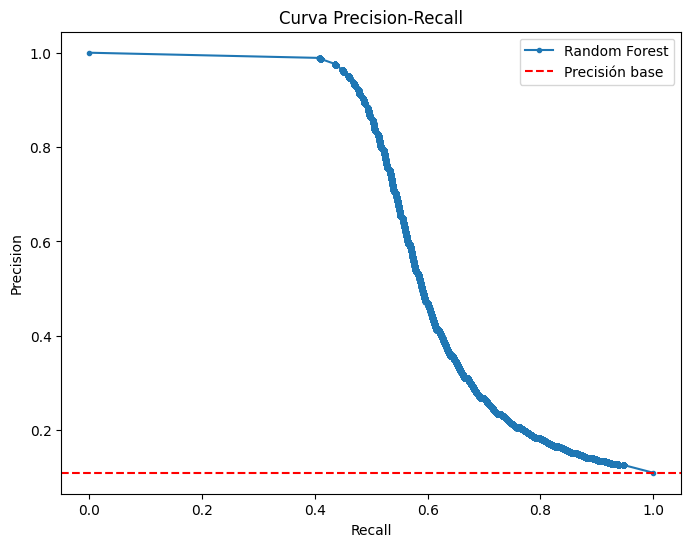

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.axhline(y=y_test.mean(), color='red', linestyle='--', label='Precisión base')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.show()

# ** Paso 1: Instalar e importar SMOTE**

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

 # **Paso 2: Aplicar SMOTE al conjunto de entrenamiento**

In [ ]:
# Rellenar NaN con la media de cada columna numérica
X_train_processed = X_train.fillna(X_train.mean())

# Crear instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar oversampling
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

print("Tamaño original:", X_train.shape, y_train.shape)
print("Tamaño balanceado:", X_train_res.shape, y_train_res.shape)

Tamaño original: (4655263, 21) (4655263,)
Tamaño balanceado: (8289232, 21) (8289232,)


# **Paso 3: Entrenar el modelo con datos balanceados**

In [ ]:
model = RandomForestClassifier(
    n_estimators=30,
    random_state=42
)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=30, random_state=42)

# **Paso 4: Evaluación inicial**

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[978874  57219]
 [ 51072  76651]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95   1036093
           1       0.57      0.60      0.59    127723

    accuracy                           0.91   1163816
   macro avg       0.76      0.77      0.77   1163816
weighted avg       0.91      0.91      0.91   1163816



- Aquí se usa el umbral por defecto del modelo (generalmente 0.5) para convertir probabilidades en clases (0 o 1).
- model.predict() ya aplica ese umbral internamente.
- Es útil para una evaluación rápida, pero no necesariamente óptima si las clases están desbalanceadas o si importa más el recall que la precisión.


**✨ Diferencia clave**

|   Método          |   Umbral   |       Ventaja                |     Limitación             |
|-------------------|------------|------------------------------|----------------------------|
| predict()         |Fijo (0.5)  |   Rápido y directo           | No optimiza métricas       |    
| predict_proba()   |Óptimo (F1) |   Personalizado, balanceado  | Requiere cálculo adicional |






# **Paso 5: Ajustar umbral y buscar el óptimo**

In [ ]:
y_proba = model.predict_proba(X_test)[:,1]

# Curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"Umbral óptimo con SMOTE: {best_threshold:.2f}")
print(f"F1-score máximo con SMOTE: {best_f1:.3f}")

# Evaluación con umbral óptimo
y_pred_optimo = (y_proba >= best_threshold).astype(int)
print(confusion_matrix(y_test, y_pred_optimo))
print(classification_report(y_test, y_pred_optimo))

Umbral óptimo con SMOTE: 0.77
F1-score máximo con SMOTE: 0.653
[[1019388   16705]
 [  57686   70037]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96   1036093
           1       0.81      0.55      0.65    127723

    accuracy                           0.94   1163816
   macro avg       0.88      0.77      0.81   1163816
weighted avg       0.93      0.94      0.93   1163816



- Clase 0 (puntual/no grave)
- 1,019,388 vuelos correctamente clasificados.
- 16,705 falsos positivos (se marcaron como graves sin serlo).
- Clase 1 (grave)
- 70,037 vuelos graves correctamente detectados.
- 57,686 falsos negativos (se escaparon).

👉 Comparado con el modelo sin SMOTE, ahora se detecta más retrasos graves y con mejor equilibrio entre precisión y recall.

🔹 Métricas por clase
- Clase 0 (no grave)
- Precision: 0.95
- Recall: 0.98
- F1: 0.96 → excelente rendimiento.
- Clase 1 (grave)
- Precision: 0.81 → cuando predice “grave”, acierta el 81%.
- Recall: 0.55 → detecta el 55% de los retrasos graves (subió respecto al modelo original).
- F1: 0.65 → mejor equilibrio que antes.

🔹 Métricas globales
- Accuracy: 0.94 → muy alto.
- Macro avg (0.77 recall) → refleja que la clase minoritaria mejoró.
- Weighted avg (0.93 F1) → excelente rendimiento general.
👉 El F1-score máximo con SMOTE (0.65) es superior que  sin SMOTE (0.63). Esto confirma que el oversampling ayudó a mejorar la detección de retrasos graves.

🎯 Conclusión operativa
- El modelo ahora es más justo con la clase minoritaria: detecta más retrasos graves sin perder demasiada precisión.
- El recall sigue siendo moderado (55%), pero ya es mejor que el 50% que se tenía antes.
- El sistema de alertas es más confiable: menos falsos positivos que con umbral bajo, y más retrasos graves detectados que sin SMOTE.


                Variable  Importancia
1   RETRASO_AVIÓN_TARDÍO     0.512292
0            HORA_SALIDA     0.459895
15          AEROLÍNEA_NK     0.004251
17          AEROLÍNEA_UA     0.003926
20          AEROLÍNEA_WN     0.003412
10          AEROLÍNEA_DL     0.002888
13          AEROLÍNEA_HA     0.002554
8           AEROLÍNEA_AS     0.001746
16          AEROLÍNEA_OO     0.001468
9           AEROLÍNEA_B6     0.001045
11          AEROLÍNEA_EV     0.000852
14          AEROLÍNEA_MQ     0.000732
12          AEROLÍNEA_F9     0.000696
5           DÍA_SEMANA_5     0.000570
3           DÍA_SEMANA_3     0.000568
6           DÍA_SEMANA_6     0.000559
19          AEROLÍNEA_VX     0.000536
7           DÍA_SEMANA_7     0.000534
4           DÍA_SEMANA_4     0.000532
18          AEROLÍNEA_US     0.000486
2           DÍA_SEMANA_2     0.000457


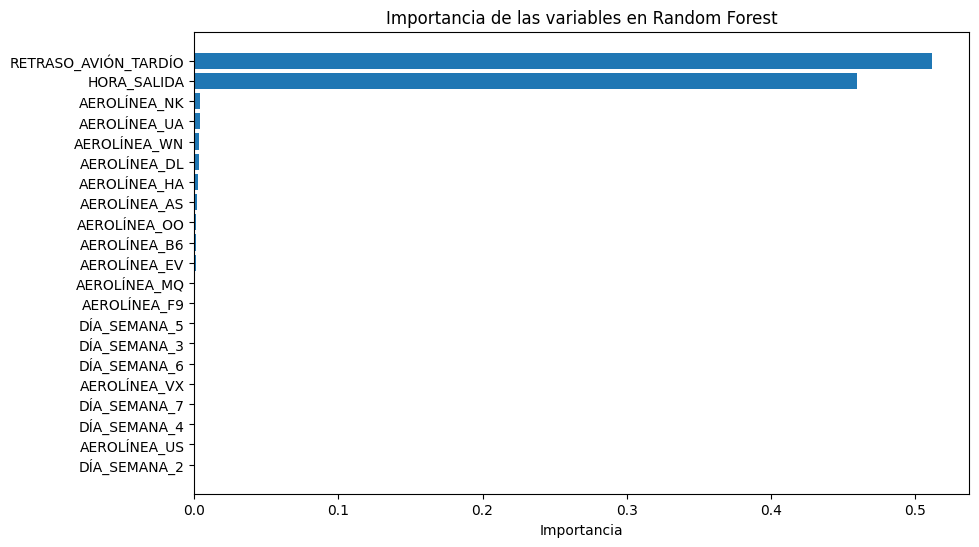

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Importancia de cada variable
importancias = model.feature_importances_

# Crear DataFrame ordenado
features = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

print(features)

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.barh(features['Variable'], features['Importancia'])
plt.gca().invert_yaxis()  # Para que la más importante quede arriba
plt.xlabel('Importancia')
plt.title('Importancia de las variables en Random Forest')
plt.show()

Lectura del gráfico: “Importancia de las variables en Random Forest”
🔸 Variables más importantes
- HORA_SALIDA → es la variable más influyente en el modelo.
- Esto indica que la hora en que está programado el vuelo tiene un fuerte impacto en la probabilidad de retraso grave.
- Puede reflejar patrones operativos: vuelos en horas pico, congestión, rotación de aeronaves.
- RETRASO_AVIÓN_TARDÍO → segunda más importante.
- Como se espera, este retraso concentra el efecto acumulado de otros factores.
- Su alta importancia confirma que es un excelente predictor de retrasos graves.
🔸 Variables moderadas
- AEROLÍNEA_NK, UA, WN, DL, etc.
- Las aerolíneas tienen importancia intermedia.
- Esto sugiere que algunas aerolíneas tienen patrones de puntualidad o retraso que afectan la predicción.
🔸 Variables menos influyentes
- DÍA_SEMANA_2 a DÍA_SEMANA_7
- Los días de la semana tienen menor impacto.
- Puede que los patrones de retraso no varíen tanto entre lunes y domingo, o que estén absorbidos por otras variables como hora de salida.

🔹 ¿Qué significa esto para el modelo?
- El modelo está aprendiendo bien: prioriza variables operativas clave como hora de salida y avión tardío.
- Las aerolíneas aportan contexto, pero no dominan la predicción.
- Los días de la semana tienen poco peso, se podría considerar reducir su presencia si se quiere simplificar el modelo.

🎯 Conclusión operativa
- Mantener todas las variables, pero ahora se sabe cuáles son las más influyentes.
- Usar esta información para:
- Hacer un modelo más simple con solo las variables top.
- Analizar por qué ciertas aerolíneas o horarios generan más retrasos graves.
- Comunicar a equipos operativos qué factores deben monitorear más de cerca.
